**Roman Schiffino**

Spring 2024

CS 251 / 252: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 4: Eigenfaces — PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a [link](https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf) to original paper.

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 4a. Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

*More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/*

In [3]:
face_imgs = np.load('data/lfwcrop.npy')
with open('data/lfwcrop_ids.txt') as fp:
    face_names = fp.read().splitlines()

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 4b. Look at the face data

In the cell below, fill in the function to create a 6x5 subplots grid of plots (*6 rows, 5 columns*). In each plot, show one of the first 30 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html):

Run the function to create the plot of the faces below.

**Note:**
- When you call `imshow`, add this optional parameter (otherwise faces will look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

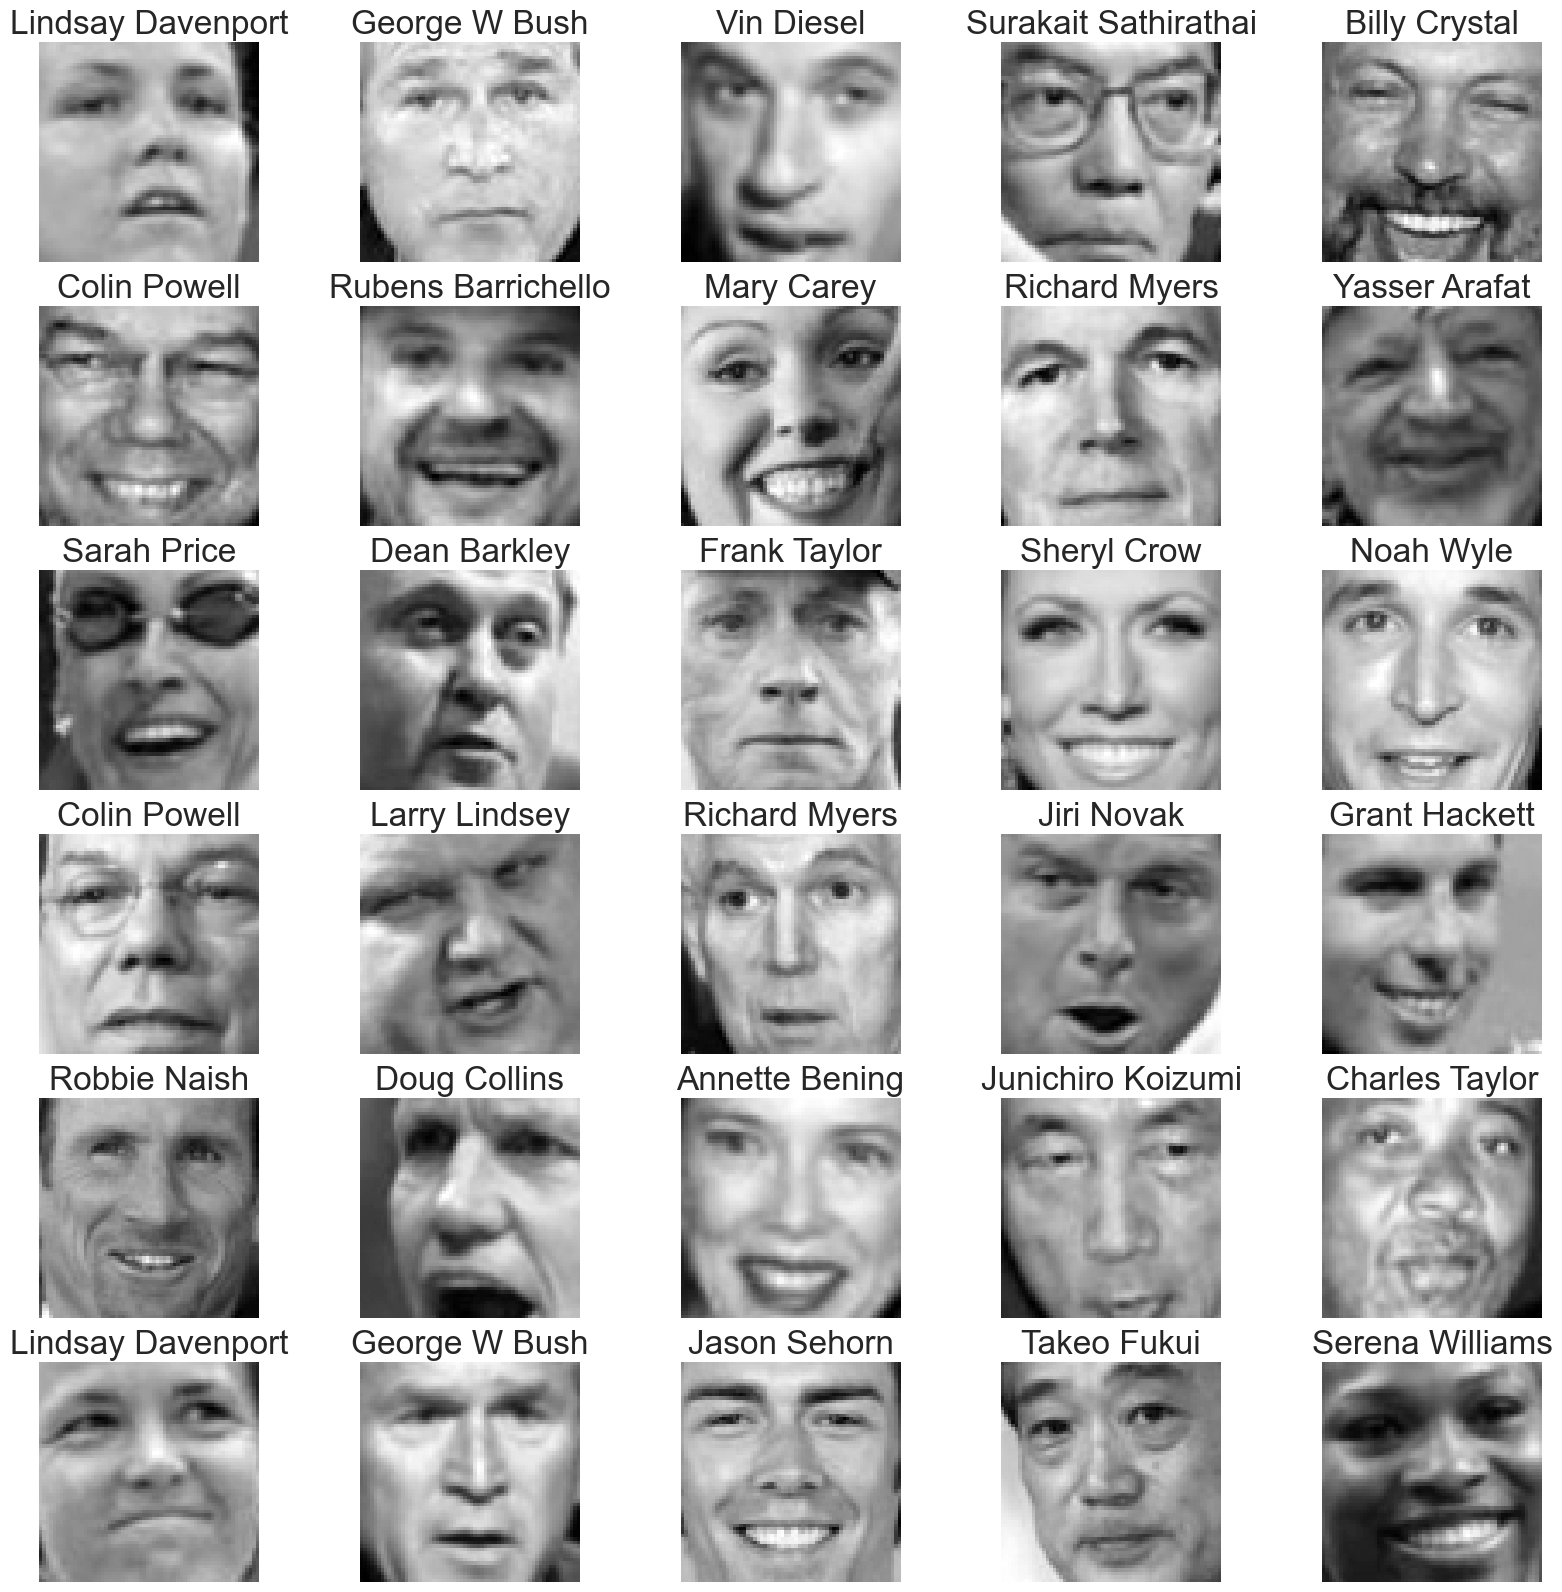

In [4]:
def face_plot(face_imgs, face_names):
    '''
    Creates a 6x5 grid of grayscale face images.
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    NOTE: Each grayscale image should have a title with the person's name in it.
    '''
    # Create 6x5 grid of faces
    fig, axs = plt.subplots(6, 5, figsize=(20, 20))
    axs = axs.ravel()
    
    # Plot each face
    for i in range(30):
        axs[i].imshow(face_imgs[i], cmap=plt.get_cmap('gray'))
        axs[i].set_title(face_names[i])
        axs[i].axis('off')
    

face_plot(face_imgs, face_names)

### 4c. Visualize the "mean face"

Take the mean face image across the dataset and show it below.

**Note:** Use the same `cmap` parameter as above and turn off x and y tick marks.

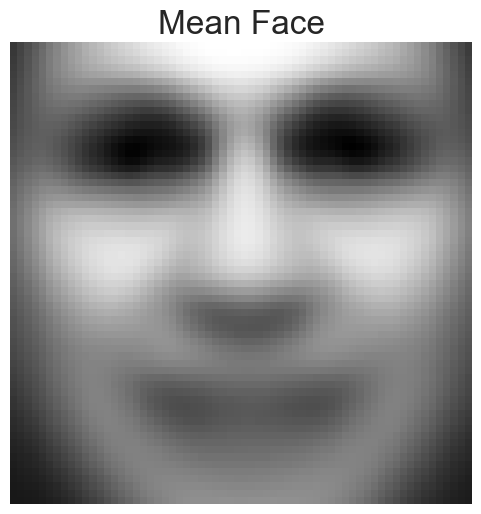

In [6]:
# Mean face
mean_face = np.mean(face_imgs, axis=0)

# Plot mean face
plt.figure(figsize=(6, 6))
plt.imshow(mean_face, cmap=plt.get_cmap('gray'))
plt.title('Mean Face')
plt.axis('off')
plt.show()

### 4d. Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


In the following cell, reshape the face data **without hardcoding** ANY of (13231, 64*64)!

In [7]:
# Your reshape code here
face_imgs_vec = face_imgs.reshape(face_imgs.shape[0], -1)

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 4e. Perform PCA on preprocessed face data

Create pandas DataFrame object that holds the face data then run PCA on the face dataset. The header names of consecutive integers `0, 1, ..., 4095` are fine. For the `vars` parameter in the `fit` method, pass in a Python list of ints (`0, 1, ..., 4095`).

**Notes:**
- This is not a "toy" dataset so it might take a few minutes for the PCA to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [12]:
import time
# Create DataFrame object
face_df = pd.DataFrame(face_imgs_vec)

# PCA   
face_pca = pca.PCA(face_df)

# Fit PCA
varNames = list(face_df.columns)
start_time = time.time()

face_pca.fit(vars_=varNames)
print(f'PCA took {time.time() - start_time:.2f} seconds to fit.')


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

### 4f. Make face PCA elbow plot

Make an elbow plot of the PCA results. Show **only show a reasonable number of PCs** to focus on the curve before it plateaus.

<Figure size 1000x600 with 0 Axes>

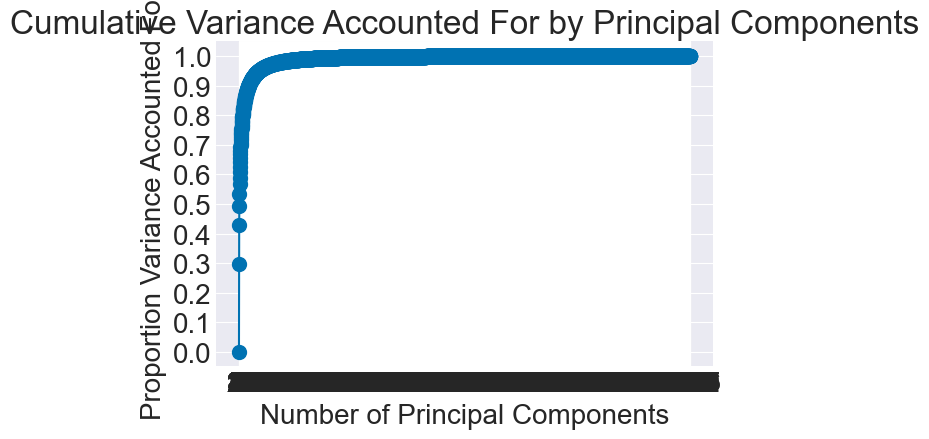

<Figure size 1000x600 with 0 Axes>

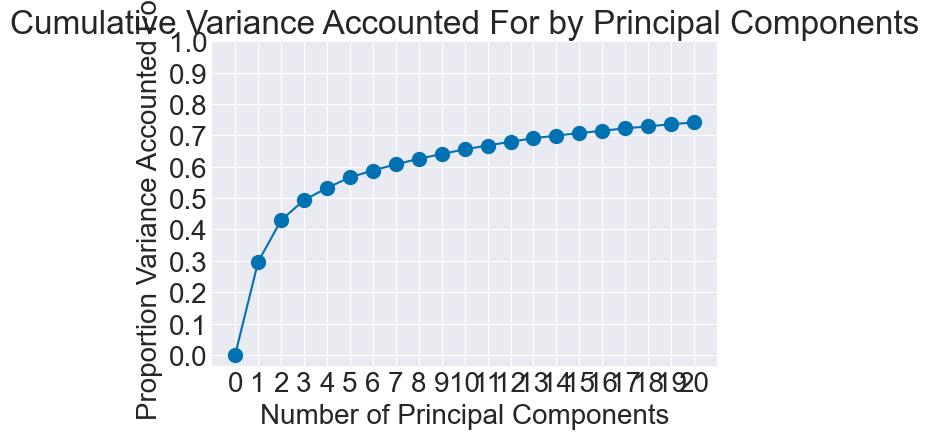

<Figure size 1000x600 with 0 Axes>

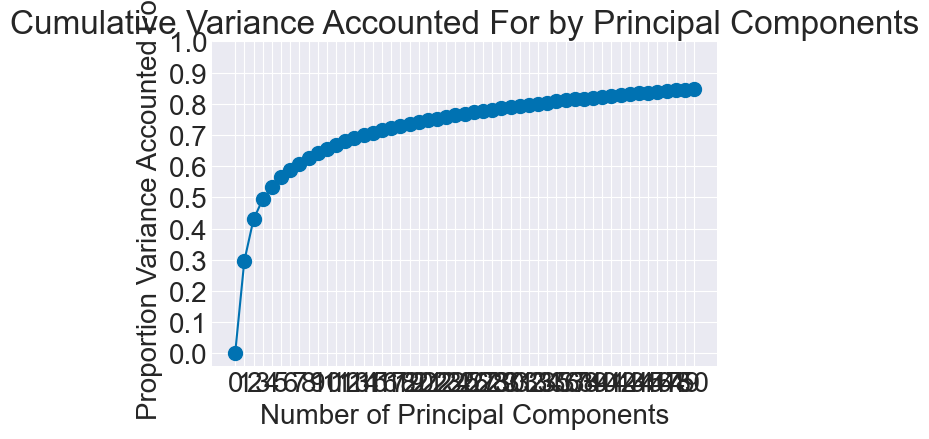

In [14]:
# Elbow plot
plt.figure(figsize=(10, 6))
face_pca.elbow_plot()
plt.tight_layout()
plt.show()
# Elbow plot
plt.figure(figsize=(10, 6))
face_pca.elbow_plot(20)
plt.tight_layout()
plt.show()
# Elbow plot
plt.figure(figsize=(10, 6))
face_pca.elbow_plot(50)
plt.tight_layout()
plt.show()

### 4g. Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 97%

Outline of the general process:
1. For each of the above number of PCs, project them back onto the original data space.
2. Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
3. Use `face_plot` to plot the reconstructed 1st 30 faces with each of the variance numbers above.

**There should be 4 6x5 plots below**

In [17]:
import numpy as np
#I'm not a fan of quessing. I will use cumulative variance to find the number of components needed to explain the variance.
for var in [0.5, 0.7, 0.8, 0.97]:
    n_comps = np.array(face_pca.cum_var).searchsorted(var) + 1
    print(f"{face_pca.cum_var[n_comps-1]*100}% variance after {n_comps} components")
    print(f'{var*100}% variance requires {n_comps} components')

53.23399174961513% variance after 4 components
50.0% variance requires 4 components
70.75760626149616% variance after 15 components
70.0% variance requires 15 components
80.07684906260896% variance after 33 components
80.0% variance requires 33 components
97.00933972034228% variance after 276 components
97.0% variance requires 276 components


In [19]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    # Assume square images
    img_y = int(np.sqrt(reconstucted_imgs.shape[1]))
    img_x = img_y
    
    # Reshape to 2D
    return reconstucted_imgs.reshape(reconstucted_imgs.shape[0], img_y, img_x)


#### 50% variance face grid

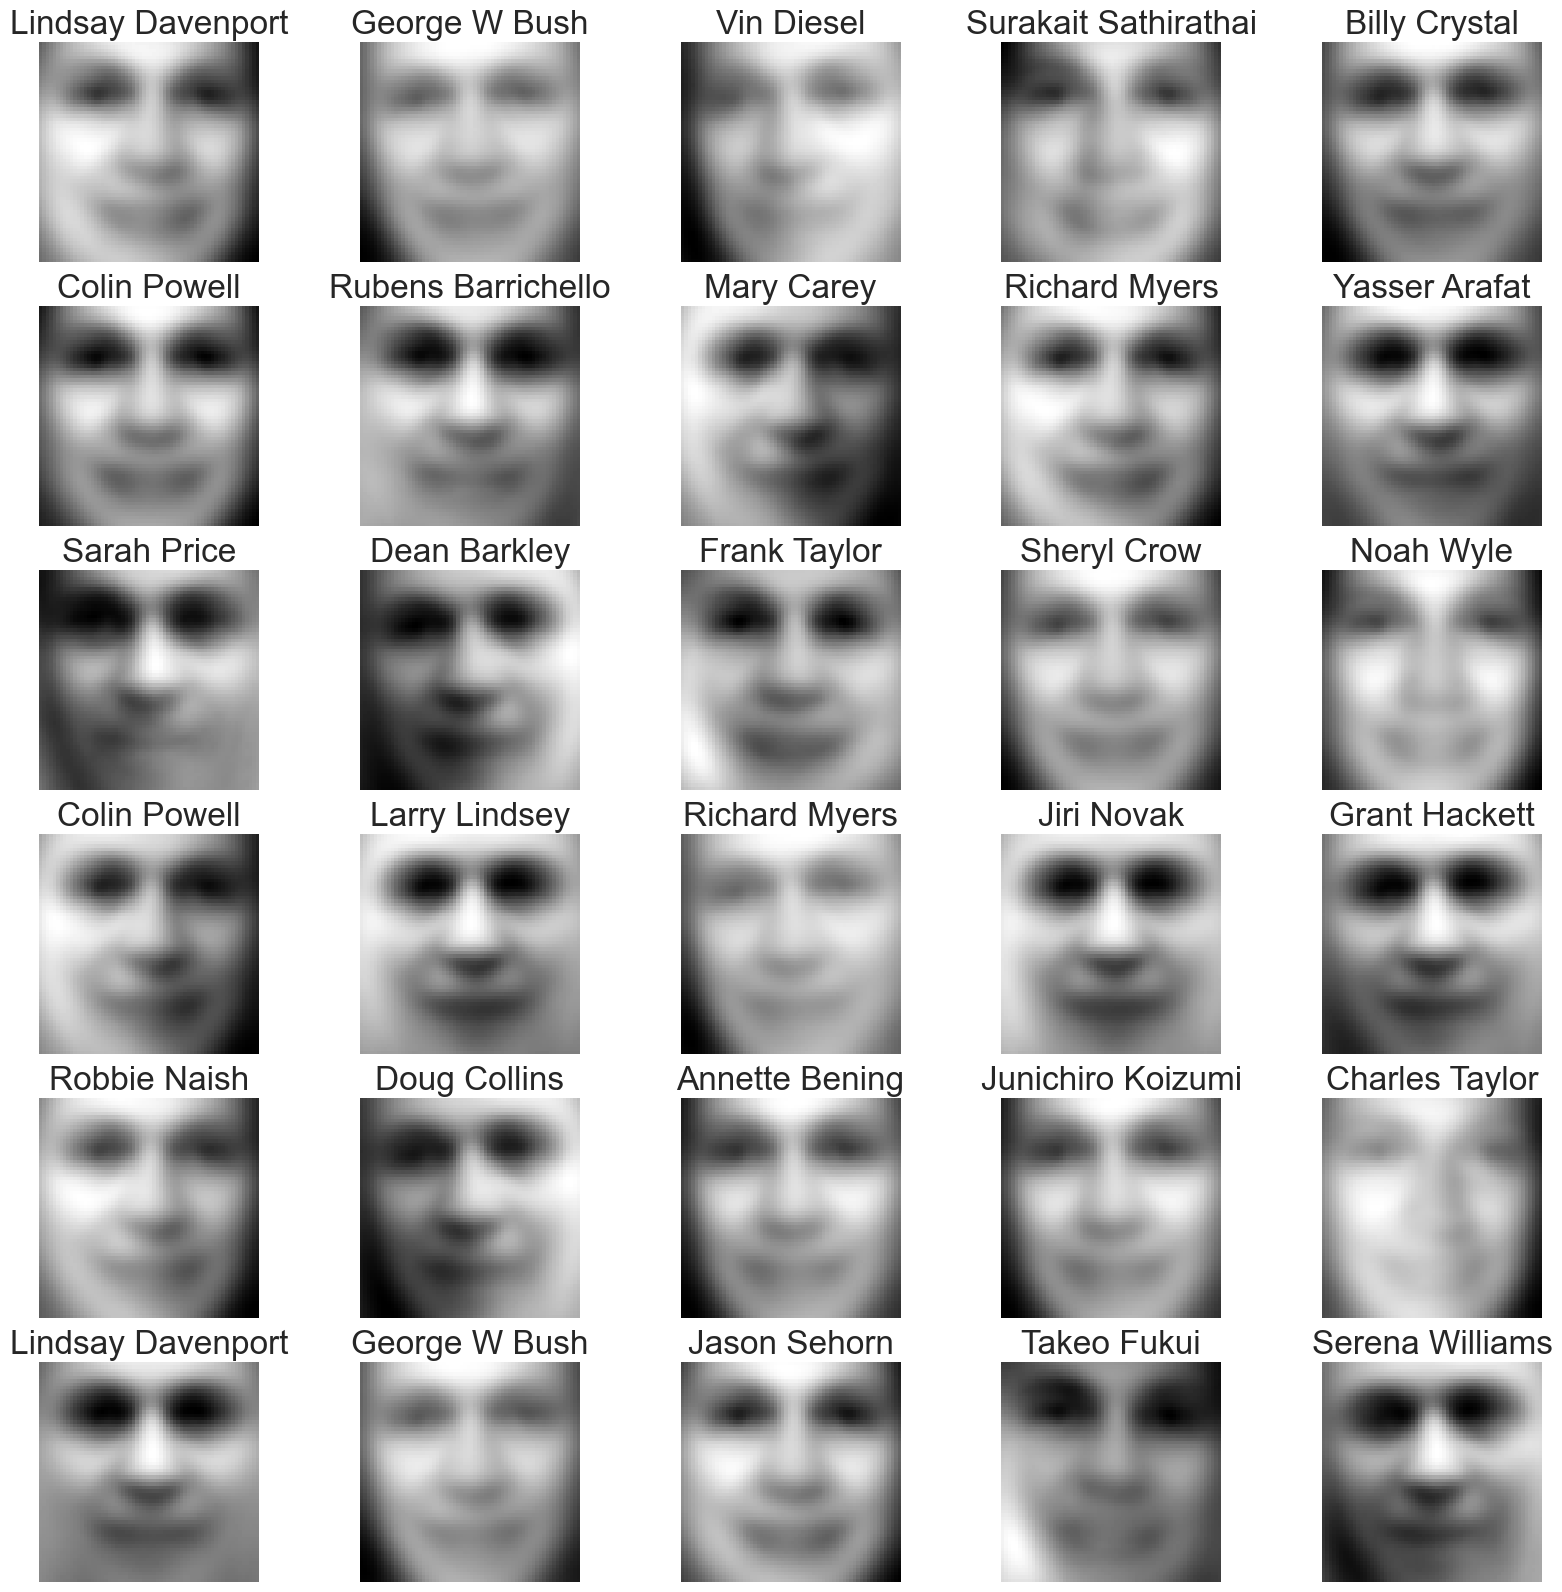

In [20]:
# Project back to original space
n_comps = 4

faces_reconstructed = face_pca.pca_then_project_back(n_comps)
face_plot(make_imgs(faces_reconstructed), face_names)
    


#### 70% variance face grid

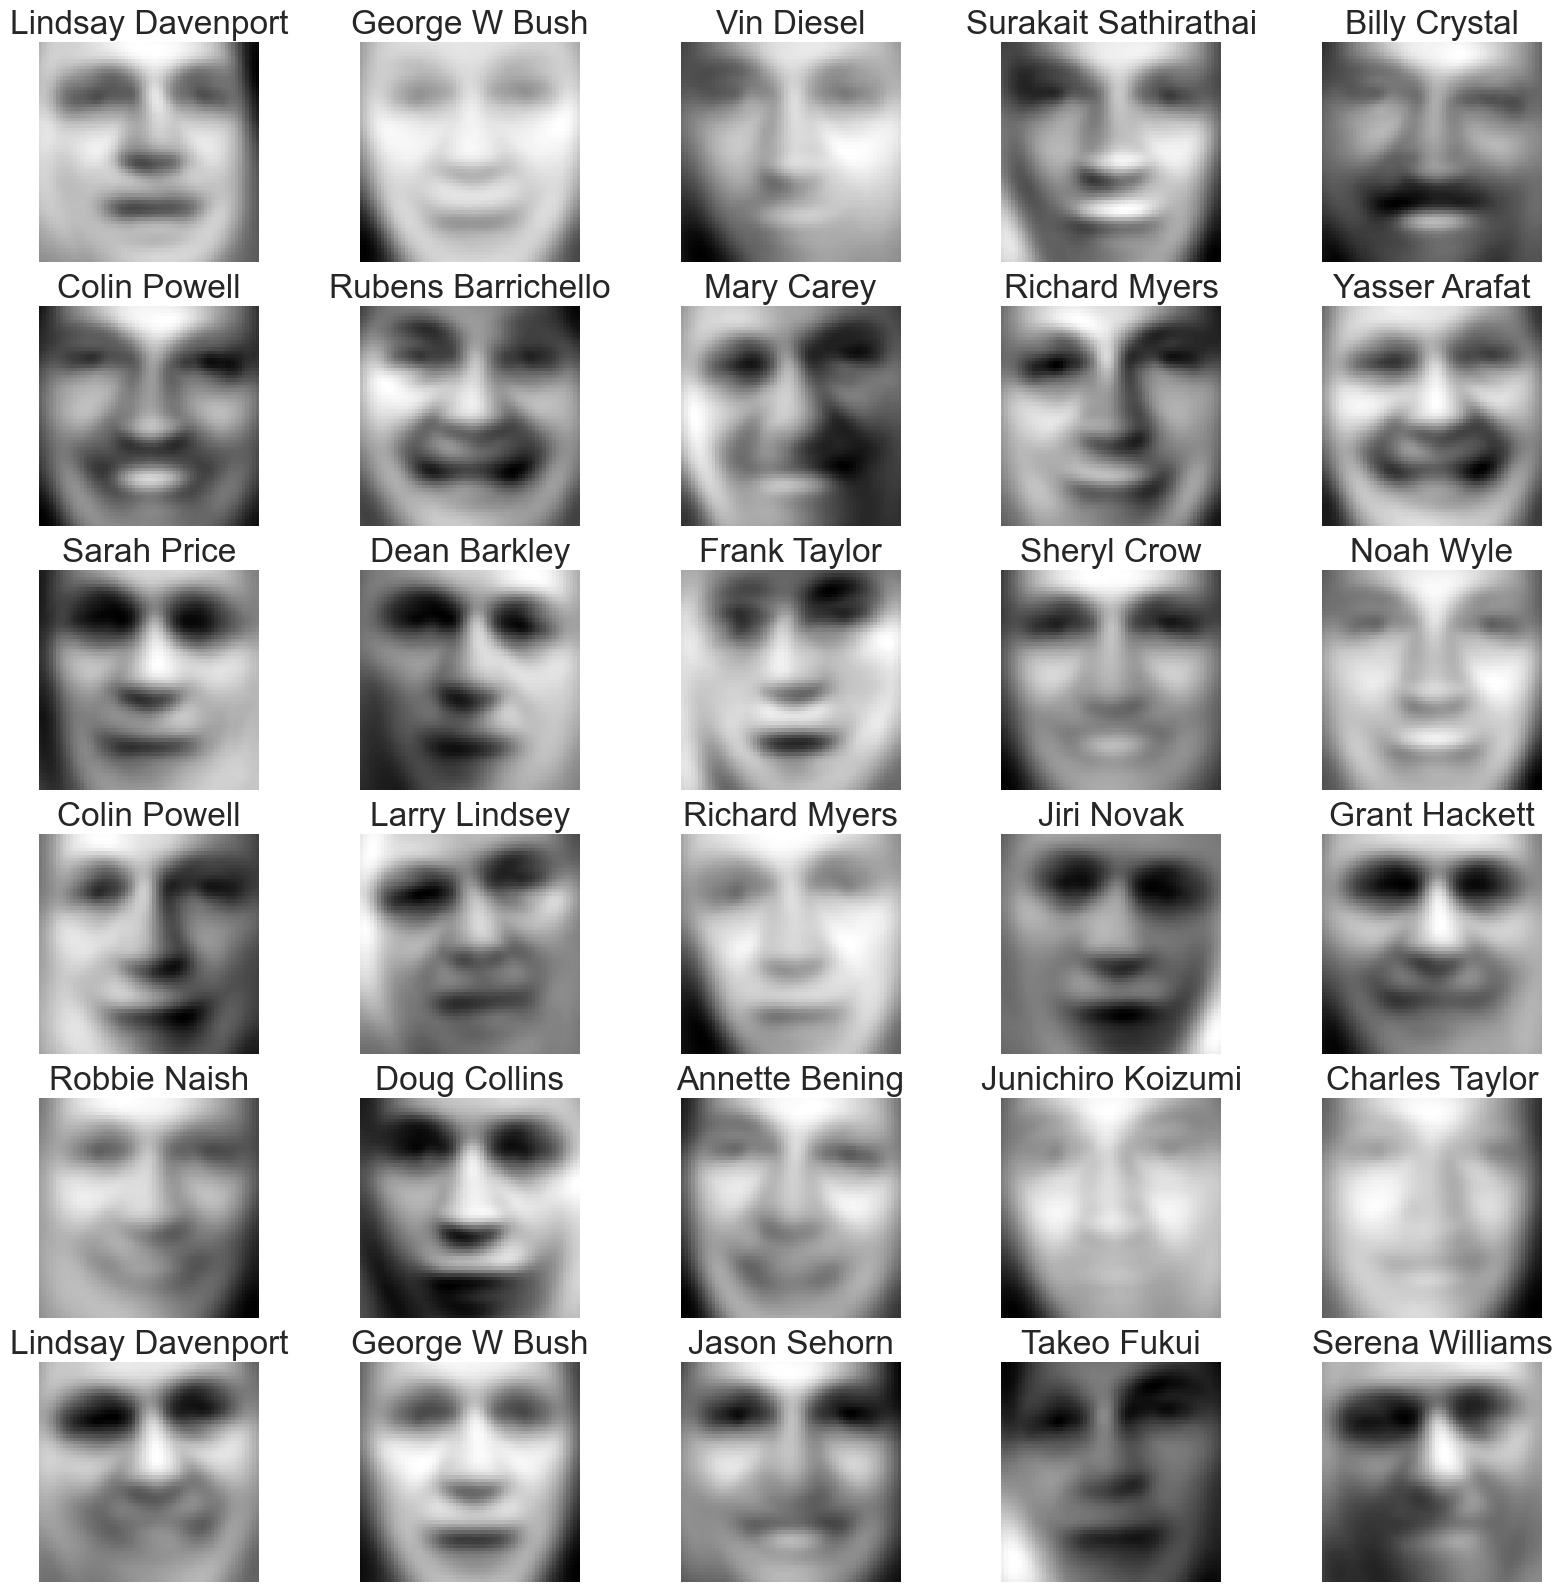

In [21]:
# Project back to original space
n_comps = 15

faces_reconstructed = face_pca.pca_then_project_back(n_comps)
face_plot(make_imgs(faces_reconstructed), face_names)
    

#### 80% variance face grid

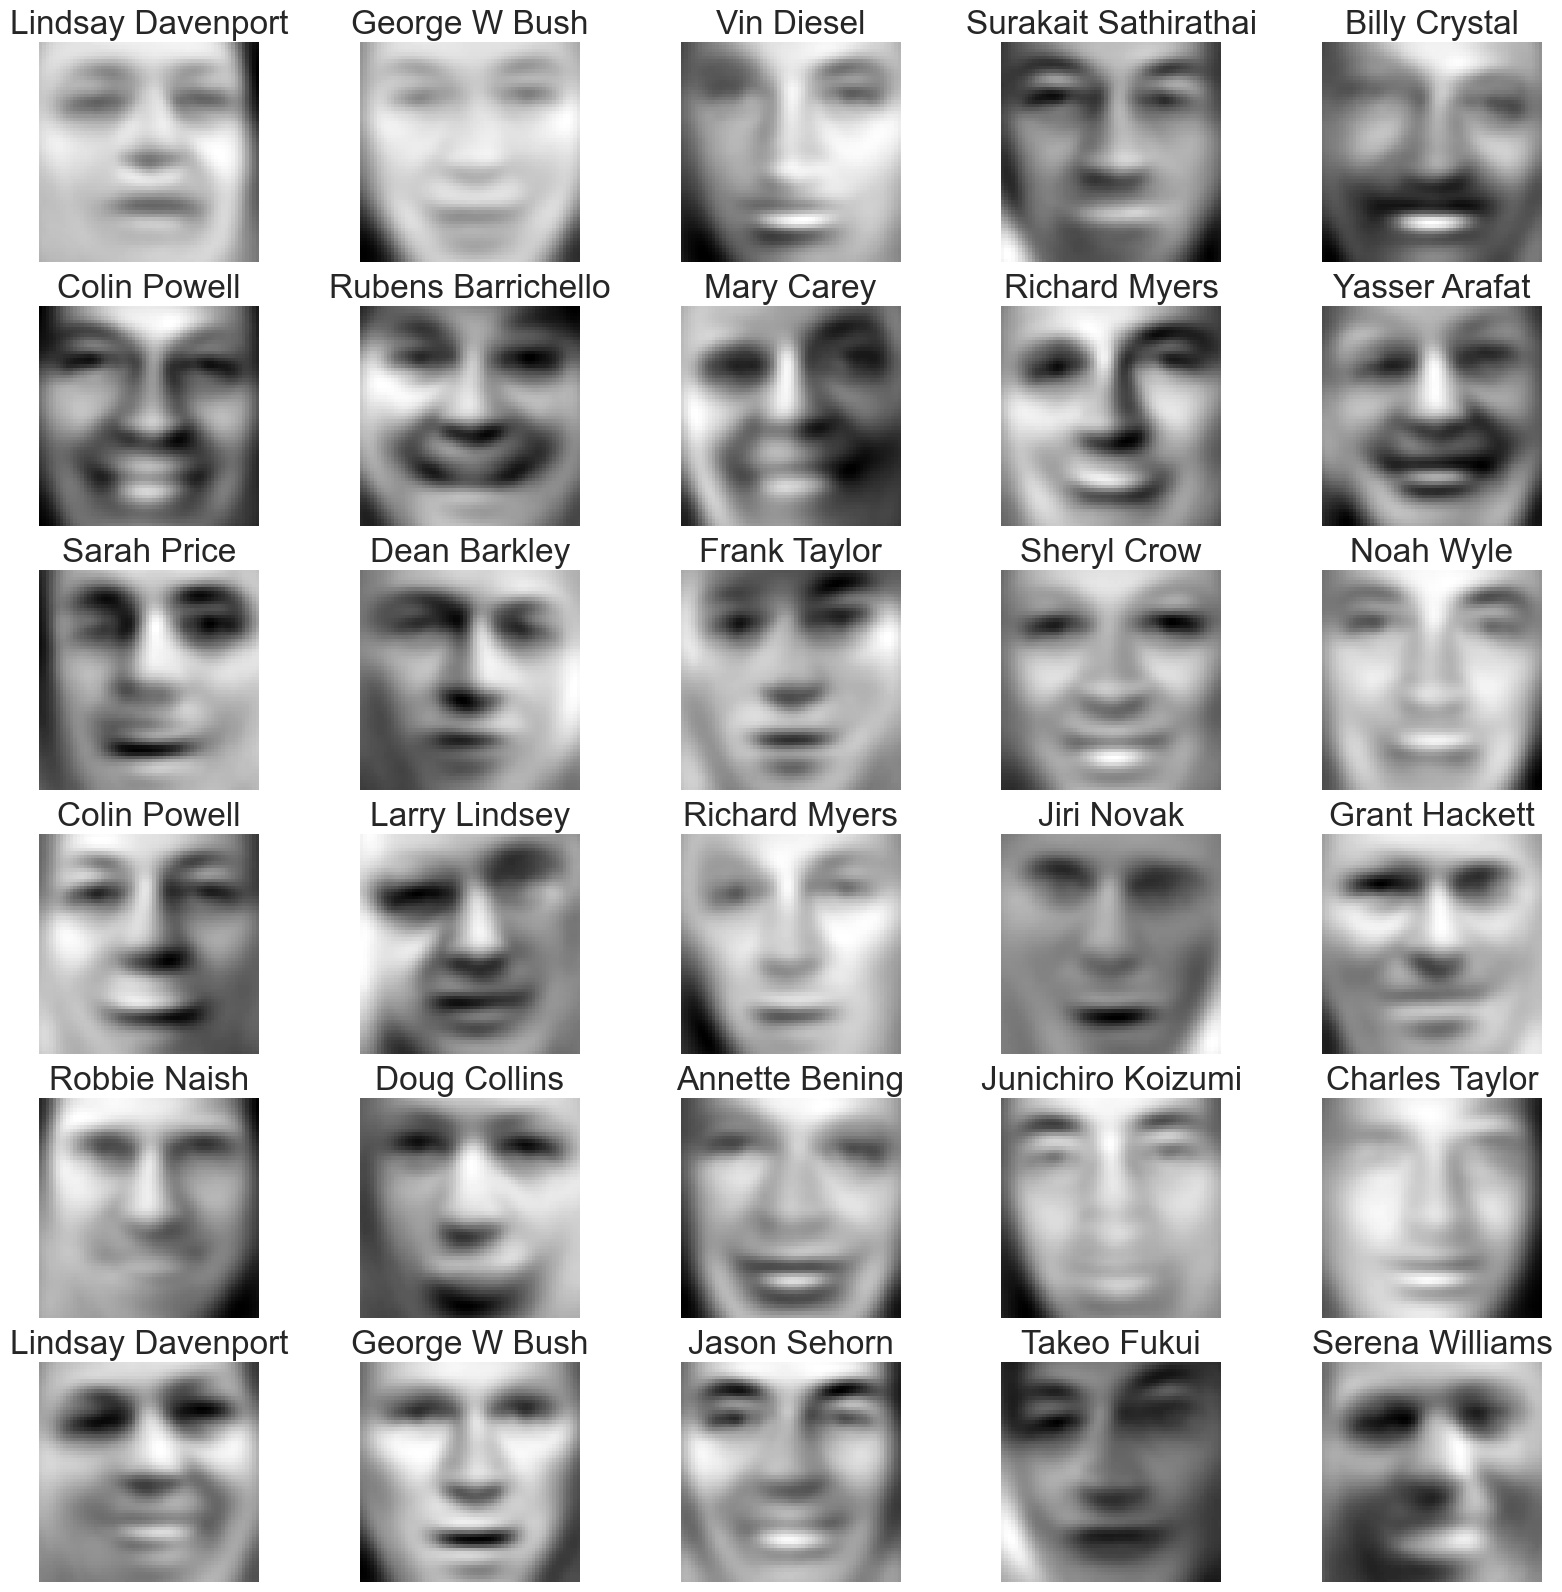

In [22]:
# Project back to original space
n_comps = 33

faces_reconstructed = face_pca.pca_then_project_back(n_comps)
face_plot(make_imgs(faces_reconstructed), face_names)
    

#### 97% variance face grid

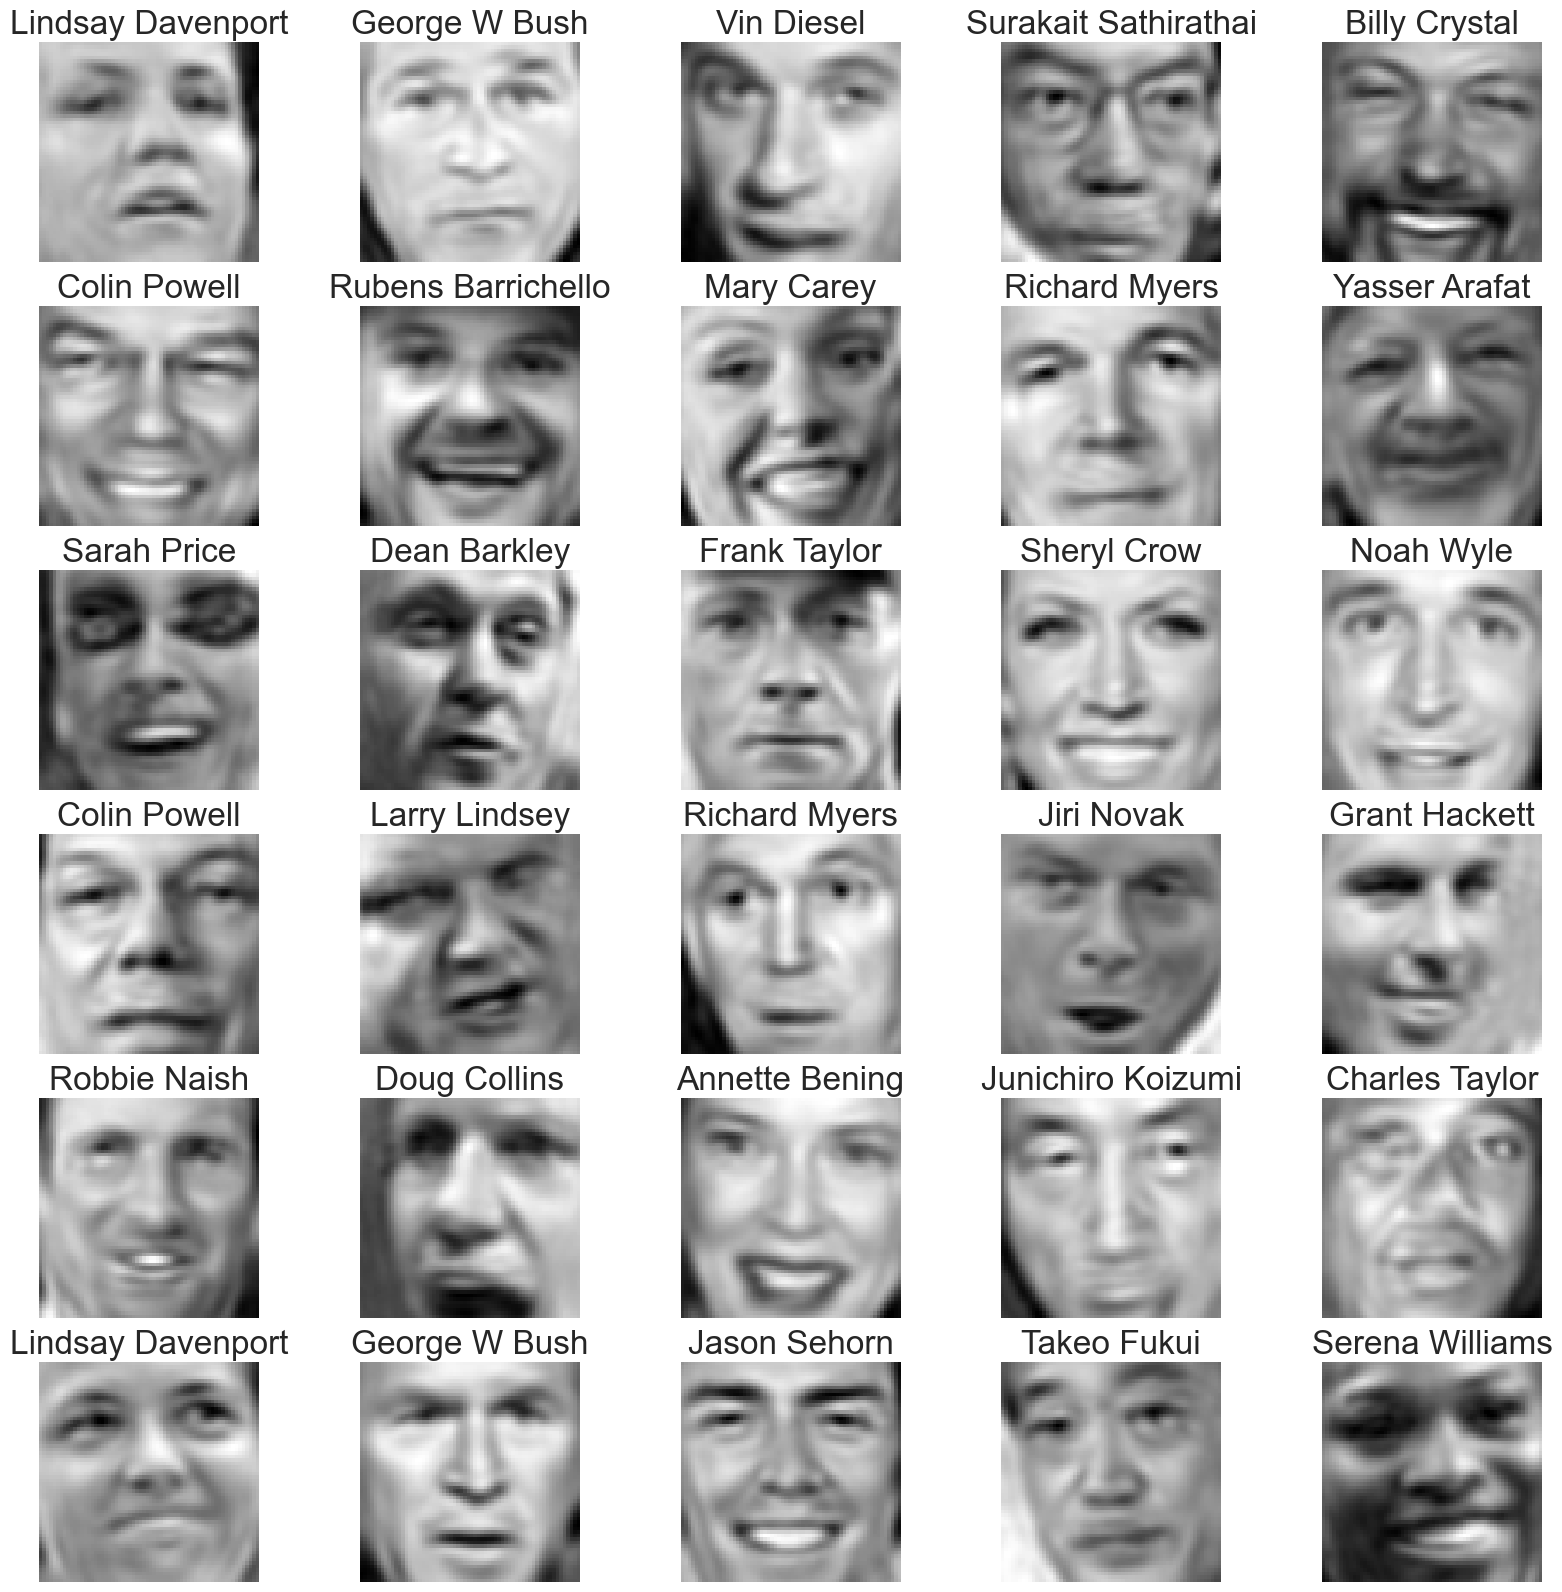

In [23]:
# Project back to original space
n_comps = 276

faces_reconstructed = face_pca.pca_then_project_back(n_comps)
face_plot(make_imgs(faces_reconstructed), face_names)
    

### 4h. Questions

**Question 12:** Pick one of the celebrity faces to focus on. Describe what specifically happens in the same celebrity face over the course of the 4 plots.

**Question 13:** Let's assume that the PCA eigenvectors are fixed/fit using the dataset above and we do not change them. Say we are interested in reconstructing of others in the general population (i.e. PCA transforming images of novel people). In a paragraph, describe how well you would expect this to work, noting any concerns you might have. **Reminder: I am expecting 100% original answers to questions that you write 100% yourself. Suspected use of generative AI to write or edit will result in 0 points.** I am grading your ideas, not your style/prose/grammar.



**Answer 12:** 
I chose George W Bush's face in row 6 column 2. In the 50% variance face grid, the face is blurry and unrecognizable its almost undifferentiable from the mean face. In the 70% variance face grid, the face is still blurry but the features are a little more defined. In the 80% variance face grid, the face is still blurry and hardly recognizable but slightly less so than before. In the 97% variance face grid, the face is the most recognizable and the features are the quite defined It's the only one of the three resolutions where you could resolutely say who it was in the image. The face is still a bit blurry but its pretty good.

**Answer 13:** I would assume that it would just slowly transform them into each respective face dpending on their location in the grid. From my understanding of module theory we could turn the PCA grid for this whole array into its Jordan-canonical form and then have a completely diagonal matrix of eigen values. To be quite honest I'm not a 100% sure but I believe the transformation matrix of the grid would affect each face differnetly because of the orthogonality of the eigenvectors, but again not sure.



## Extensions

Didn't have too much time, but I reworked my data class from earlier on to take pandas data frames, I made every method based of static methods to allow all of the methods to be used outside of a class instance and I also implemnted super robust data validation. Also I allowed the project back method to take selected principal components and the same for the loadings plot. My comments are really bad this time around as this was a rush job, so a lot of them are just copy pastes and not the most accurate. However, my type hinst should all be correct.

### a. Reminder: AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions.** This includes both written analysis, plotting, and code. We will only grade **your** work, not an AI's. **We will stop grading your project if we notice AI-generated content (to any capacity).**

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, loading plot, etc) to inform your analysis and exploration. 

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

### 3. Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.